# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

# Loading the dataset

In [2]:
df=pd.read_csv("Mobile_data.csv")

In [3]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


# EDA

In [4]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [5]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


#### Checking for missing values

In [6]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

#### There are no missing values

#### Checking for outliers

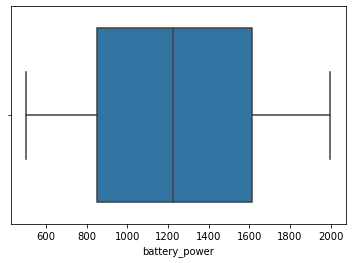

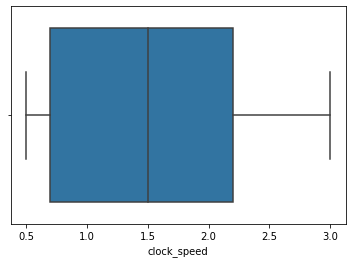

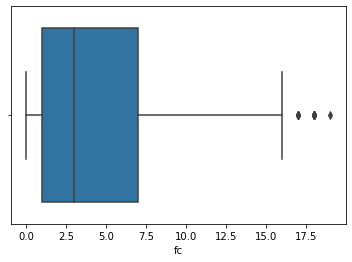

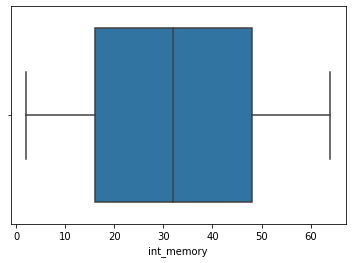

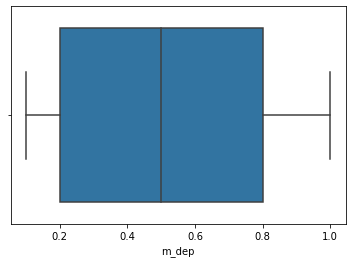

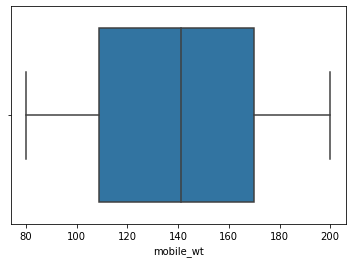

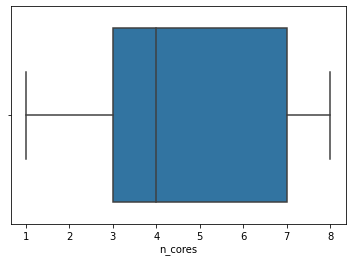

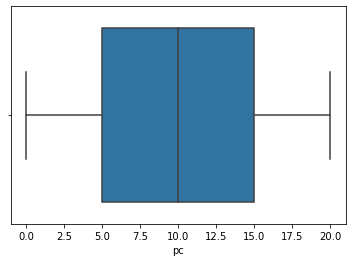

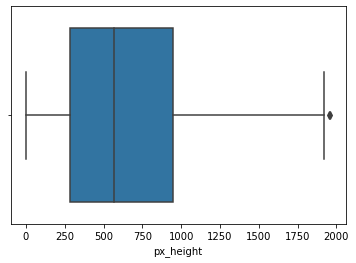

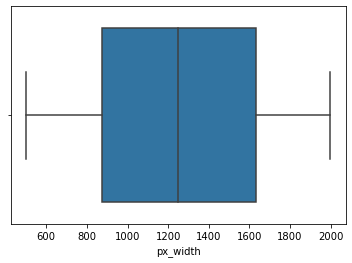

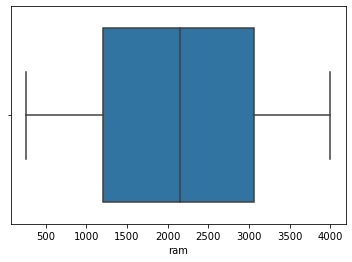

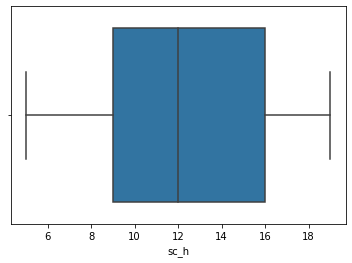

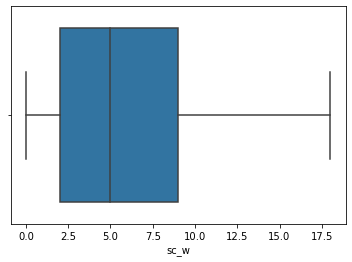

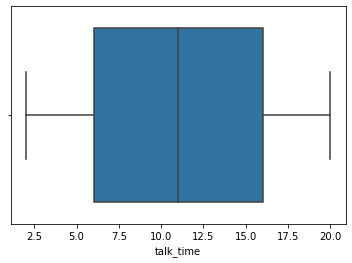

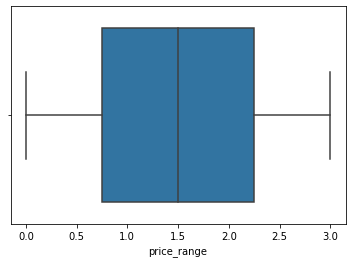

In [7]:
for column in df:
    plt.figure()
    sns.boxplot(x=column,data=df)

#### There are very few outliers

#### Correlation

In [8]:
df.corr()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818


<AxesSubplot:>

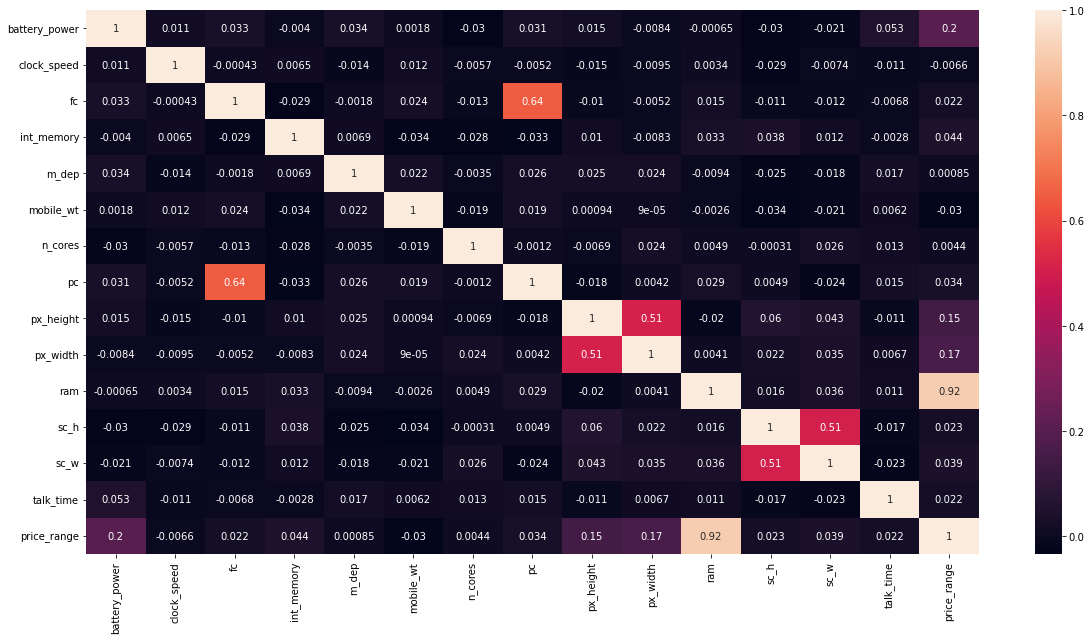

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True)

# Choosing the appropirate model

## 1.KNN

In [10]:
x=df.drop(['price_range'],axis=1)
y=df["price_range"]

In [11]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [12]:
model = KNeighborsClassifier(n_neighbors= 16 )


In [13]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [14]:
model.score(x_train,y_train)

0.9342857142857143

In [15]:
model.score(x_test,y_test)

0.9416666666666667

### Checking if scaling method can improve the score of the model

### Standard Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.90259726,  0.83077942, -0.76249466, ..., -0.78498329,
         0.2831028 ,  1.46249332],
       [-0.49513857, -1.2530642 , -0.99289039, ...,  1.11426556,
        -0.63531667, -0.73426721],
       [-1.5376865 , -1.2530642 , -0.53209893, ..., -0.31017108,
        -0.86492153, -0.36814045],
       ...,
       [ 1.53077336, -0.76274805, -0.76249466, ..., -0.78498329,
        -1.0945264 , -1.10039396],
       [ 0.62252745, -0.76274805, -0.07130748, ...,  1.35167167,
         0.9719174 ,  1.46249332],
       [-1.65833069,  0.58562134,  0.15908825, ...,  1.58907778,
        -0.4057118 , -1.6495841 ]])

In [17]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)

In [18]:
model = KNeighborsClassifier(n_neighbors= 16 )
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [19]:
model.score(x_train,y_train)

0.74

In [20]:
model.score(x_test,y_test)

0.655

#### We see that there is a decrease in the score so scaling does not  help in this model

#### Trying to find the optimal K value using Cross validation

### Crossvalidation

In [21]:
from sklearn.model_selection import cross_val_score
neighbors=list(range(1,50,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [22]:
MSE=[1-x for x in cv_scores]
MSE

[0.09099999999999997,
 0.07499999999999996,
 0.0764999999999999,
 0.0734999999999999,
 0.07199999999999984,
 0.06649999999999989,
 0.06900000000000017,
 0.0684999999999999,
 0.0684999999999999,
 0.06799999999999995,
 0.06599999999999984,
 0.0684999999999999,
 0.07050000000000023,
 0.06899999999999995,
 0.06899999999999995,
 0.0695,
 0.07049999999999979,
 0.07050000000000001,
 0.07300000000000006,
 0.07099999999999995,
 0.07400000000000007,
 0.07250000000000001,
 0.07150000000000001,
 0.07400000000000007,
 0.0734999999999999]

In [23]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

21

###### Optimal k value is 21

### Building a model with 'k'=21

In [42]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
model = KNeighborsClassifier(n_neighbors= 21 )
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [43]:
model.score(x_train,y_train)

0.9378571428571428

In [44]:
model.score(x_test,y_test)

0.94

#### Using cross validation we can find the correct k value which gives us a better result

# 2.SVM

In [24]:
cls=svm.SVC(kernel='linear')
cls.fit(x_train,y_train)

SVC(kernel='linear')

In [25]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [26]:
pred=cls.predict(x_test)

In [27]:
metrics.accuracy_score(y_test,pred)

0.27166666666666667

In [28]:
cls.score(x_train,y_train)

0.24071428571428571

In [29]:
cls.score(x_test,y_test)

0.27166666666666667

#### With scaling

In [30]:
cls=svm.SVC(kernel='linear',C=17)
cls.fit(x_train,y_train)

SVC(C=17, kernel='linear')

In [31]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)

In [32]:
cls.fit(x_train,y_train)

SVC(C=17, kernel='linear')

In [33]:
pred=cls.predict(x_test)

In [34]:
metrics.accuracy_score(y_test,pred)

0.975

In [35]:
cls.score(x_train,y_train)

0.9835714285714285

In [36]:
cls.score(x_test,y_test)

0.975

#### In this case we can see that scaling gives a drastic improvement in the score

##### For this dataset we can see that SVM algorithm is more suitable as it yields to a higher score